In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [2]:
#loading data
airbnb = pd.read_csv('/content/sample_data/Airbnb_NYC_2019.csv')
#View data
airbnb.head(10)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
6,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
9,5238,Cute & Cozy Lower East Side 1 bdrm,7549,Ben,Manhattan,Chinatown,40.71344,-73.99037,Entire home/apt,150,1,160,2019-06-09,1.33,4,188


In [3]:
#Select a subset of the Airbnb NYC 2019 dataset — the subset should only contain the data where the neighbourhood group is Manhattan.
manhattan = airbnb.loc[airbnb['neighbourhood_group'] == 'Manhattan']
manhattan.head()


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
5,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


In [4]:
#How many rows are in the subset?
rows = len(manhattan.axes[0])
print("Number of Rows: " + str(rows))

#How many columns are in the subset?
cols = len(manhattan.axes[1])
print("Number of Columns: " + str(cols))

Number of Rows: 21661
Number of Columns: 16


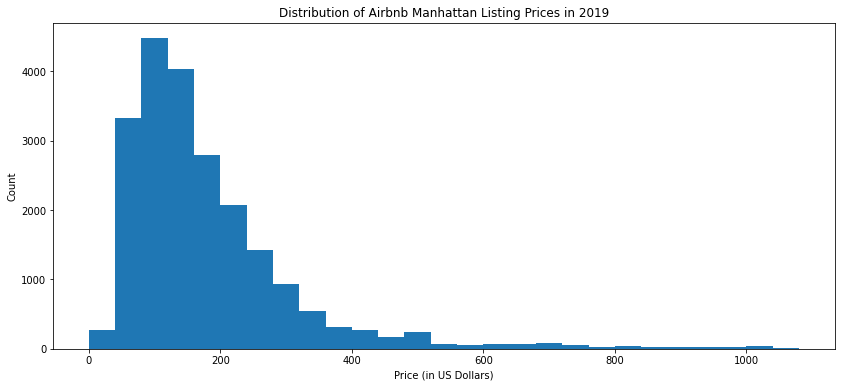

In [5]:
#Create a histogram to visualize the distribution of prices for the Manhattan listings.
plt.figure(figsize = (14,6))
plt.hist(manhattan["price"], bins = np.arange(0, 1100, 40))
plt.title("Distribution of Airbnb Manhattan Listing Prices in 2019")
plt.xlabel("Price (in US Dollars)")
plt.ylabel("Count")
plt.show()

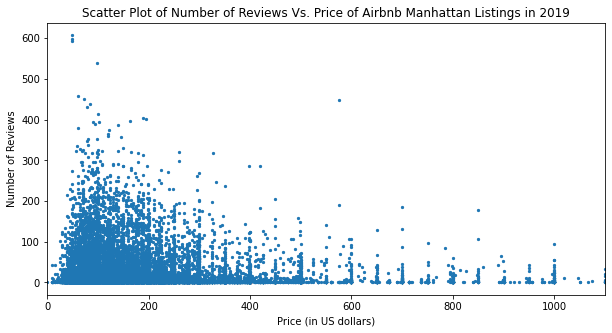

In [6]:
#Create a scatter plot to visualize the number of reviews over the price for the Manhattan listings.
plt.figure(figsize = (10,5))
plt.scatter(x = manhattan["price"], y = manhattan["number_of_reviews"], s = 5)
plt.xlim(0, 1100)
plt.title("Scatter Plot of Number of Reviews Vs. Price of Airbnb Manhattan Listings in 2019")
plt.xlabel("Price (in US dollars)")
plt.ylabel("Number of Reviews")
plt.show()

In [7]:
#Identify the “top 10” neighbourhoods from the Manhattan listings — the neighborhoods with the 10 highest counts 
#i.e. number of listings. What are they, in order of first highest count to tenth highest count?
df = manhattan.groupby('neighbourhood')['neighbourhood'].count().sort_values(ascending=False).head(10)
df

neighbourhood
Harlem                2658
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Midtown               1545
East Harlem           1117
Chelsea               1113
Lower East Side        911
Washington Heights     899
Name: neighbourhood, dtype: int64

In [8]:
#Select the subset of the Manhattan listings data corresponding to the “top 10”. 
neighbour = ['Harlem', 'Upper West Side', "Hell's Kitchen", 'East Village', 'Upper East Side', 'Midtown' , 'East Harlem', 'Chelsea', 'Lower East Side', 'Washington Heights']
dfv = manhattan[manhattan['neighbourhood'].isin(neighbour)]    
dfv


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
7,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220
8,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80178,-73.96723,Private room,79,2,118,2017-07-21,0.99,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48886,36483010,Comfy 1 Bedroom in Midtown East,274311461,Scott,Manhattan,Midtown,40.75561,-73.96723,Entire home/apt,200,6,0,NaN,NaN,1,176
48888,36484087,"Spacious Room w/ Private Rooftop, Central loca...",274321313,Kat,Manhattan,Hell's Kitchen,40.76392,-73.99183,Private room,125,4,0,NaN,NaN,1,31
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [9]:
#How many rows are in the subset?
rows = len(dfv.axes[0])
print("Number of Rows: " + str(rows))

#How many columns are in the subset?
cols = len(dfv.axes[1])
print("Number of Columns: " + str(cols))

Number of Rows: 15823
Number of Columns: 16


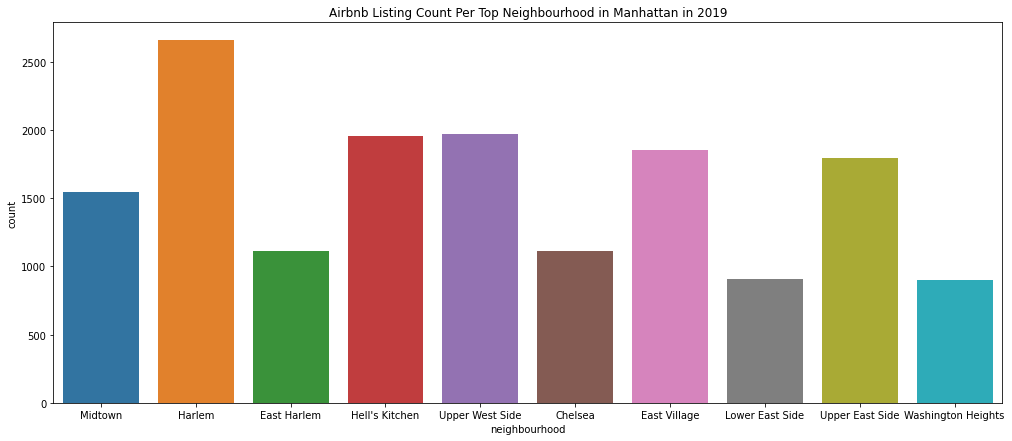

In [10]:
#Create a count plot to visualize how many Airbnb listings are in each of those “top 10” neighbourhoods in Manhattan in 2019
plt.figure(figsize=(17,7))
sn.countplot(x = 'neighbourhood', data = dfv)
plt.title('Airbnb Listing Count Per Top Neighbourhood in Manhattan in 2019')
plt.show()